# DBSCAN Project Solutions

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv('..\data\Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# null value
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

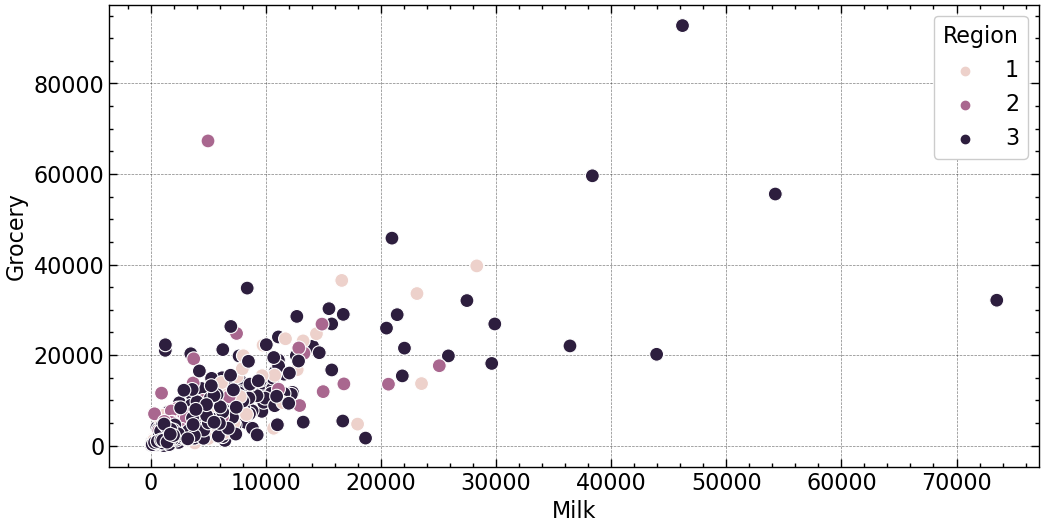

In [9]:
plt.style.use(['science','notebook','grid'])
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x='Milk', y ='Grocery', hue='Region', data=df, s=100);

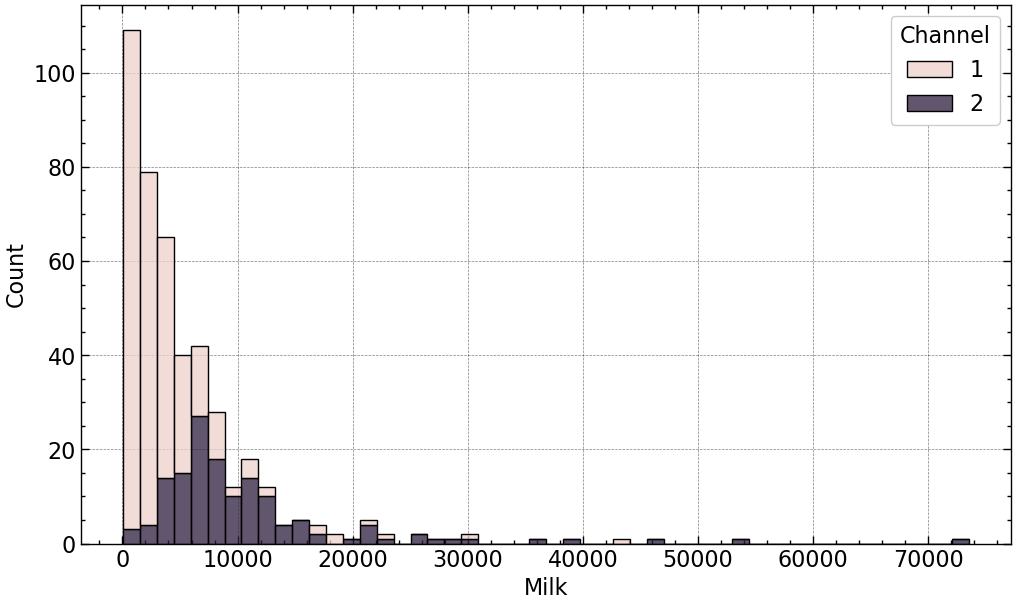

In [10]:
plt.figure(figsize=(12 ,7))
sns.histplot(x='Milk', hue='Channel', multiple='stack', data=df);

* Kita dapat melihat bahwa pengeluaran Channel2 jauh lebih tinggi dibandingkan Channel1.

* Sebagian besar pembelanjaan Channel1 berada di sisi pembelanjaan $ yang lebih rendah, dibandingkan dengan Channel2.

In [11]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [12]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

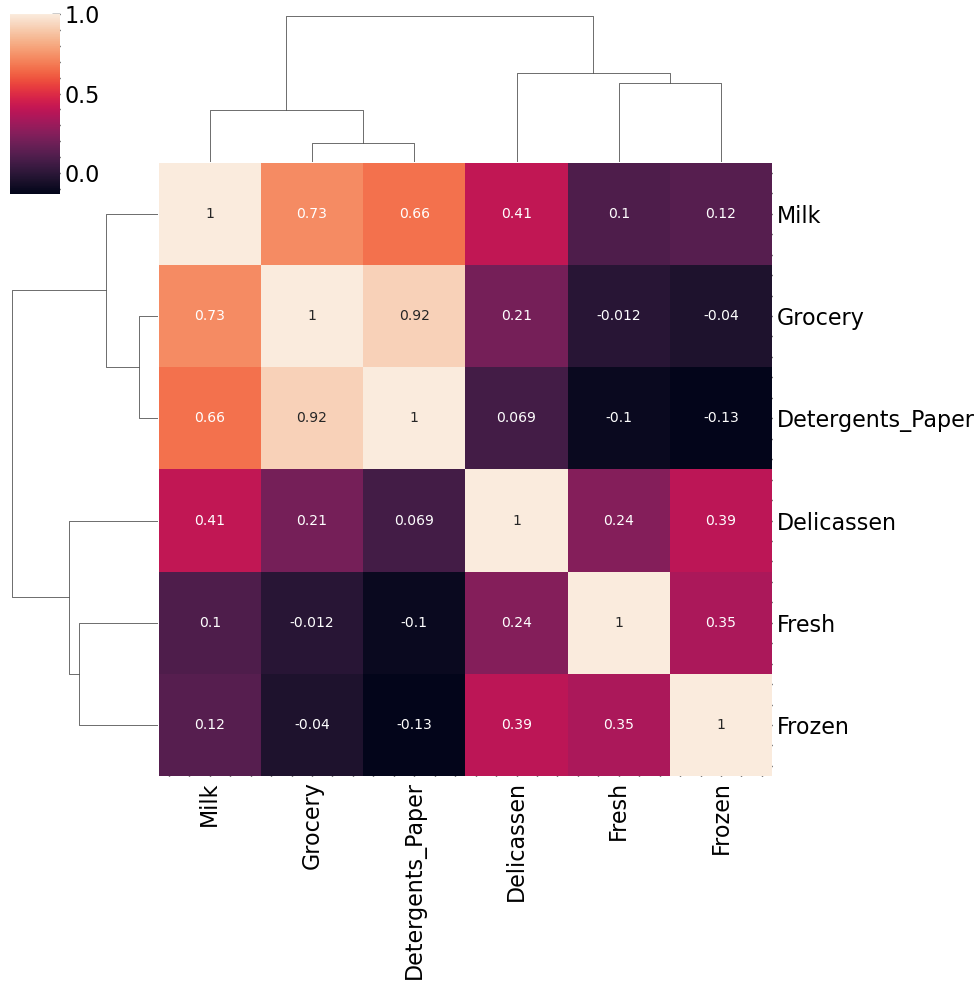

In [13]:
sns.clustermap(df.drop(['Channel','Region'], axis=1).corr(), annot= True);

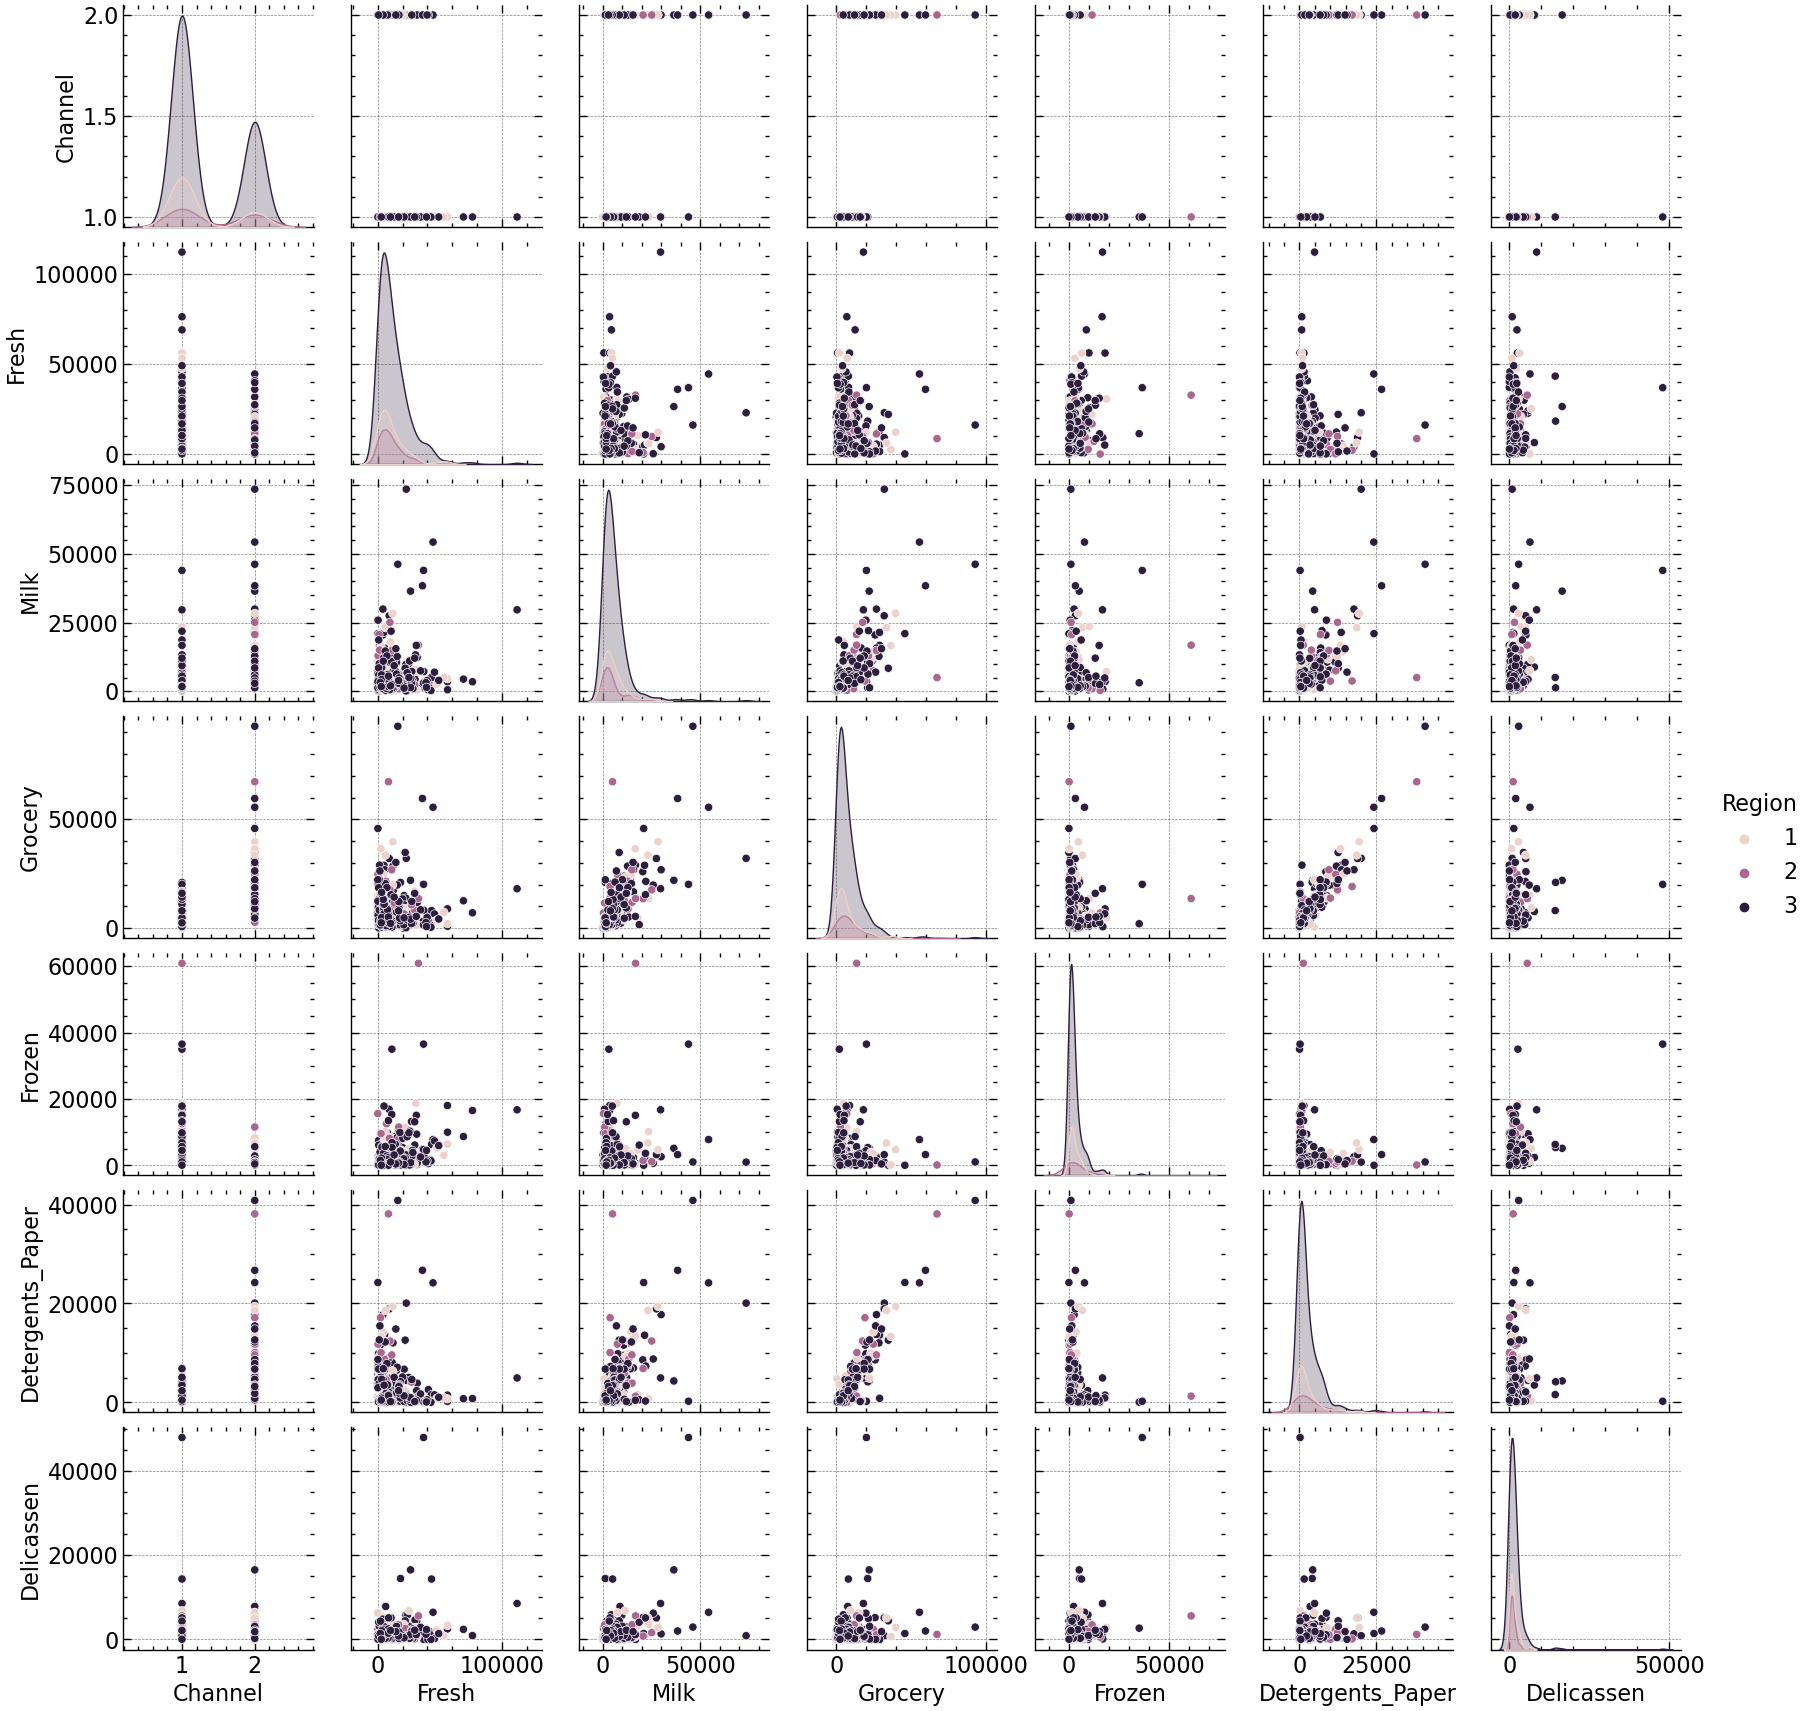

In [14]:
sns.pairplot(df, hue='Region');

* Jika kita menggunakan Channel, kita dapat melihat lebih banyak perbedaan antara Channel, yang berbeda dari Region.
* Jadi sepertinya Channel merupakan kualifikasi yang jauh lebih khas daripada Region

## DBSCAN

### scaler data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler_X = scaler.fit_transform(df)

In [18]:
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    
    # model
    model = DBSCAN(eps = eps, min_samples = 2 * scaler_X.shape[1])
    model.fit(scaler_X)
    
    # percentage of point as autlier
    pecents_outlier = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    
    outlier_percent.append(pecents_outlier)

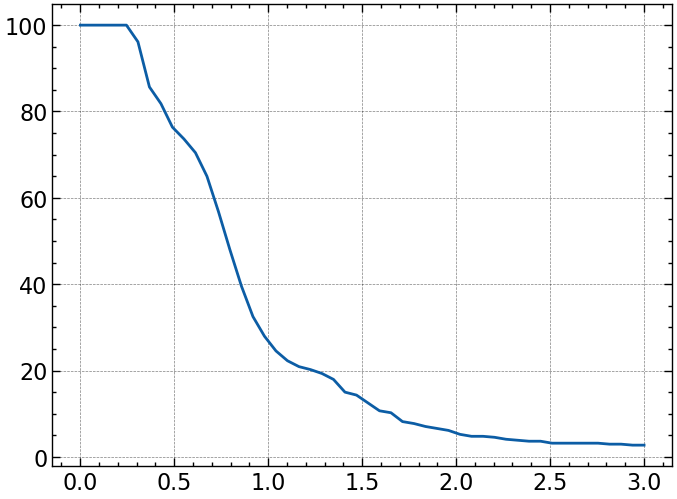

In [21]:
sns.lineplot(x =np.linspace(0.001, 3, 50), y=outlier_percent);

Pada titik ini, kita mungkin ingin berkonsultasi dengan ekspektasi domain tentang berapa persentase outlier yang diharapkan.

Lalu mengacu pada scatter plot di EDA, apakah kita akan mendefinisikan titik mana yang termasuk ouliers, dan seterusnya.

Atau kita bisa mengandalkan DBSCAN untuk membimbing kita. Jika kita mengacu pada plot garis, terlihat bahwa di sekitar nilai epsilon 2, garis tersebut semakin mendatar.

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [22]:
min_samples = 2 * scaler_X.shape[1]
model = DBSCAN(eps= 2, min_samples = min_samples)
model.fit(scaler_X)

DBSCAN(eps=2, min_samples=16)

### Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.

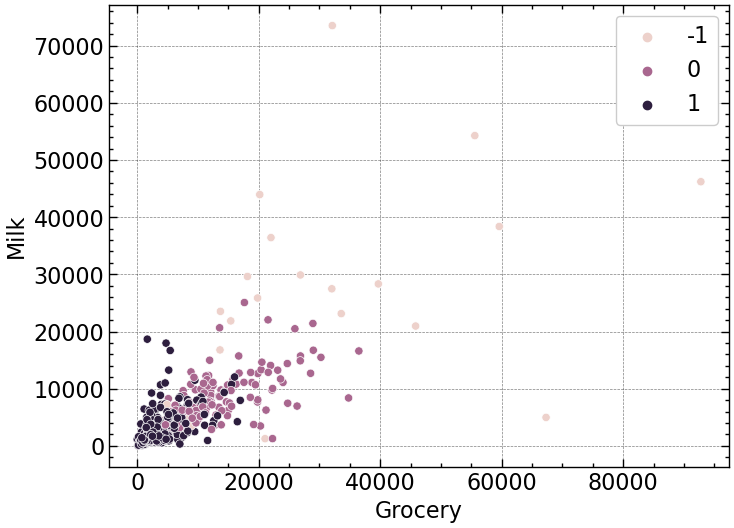

In [23]:
sns.scatterplot(x='Grocery', y='Milk', data=df, hue=model.labels_);

### Create a scatterplot of Milk vs. Detergents Paper colored by the labels.

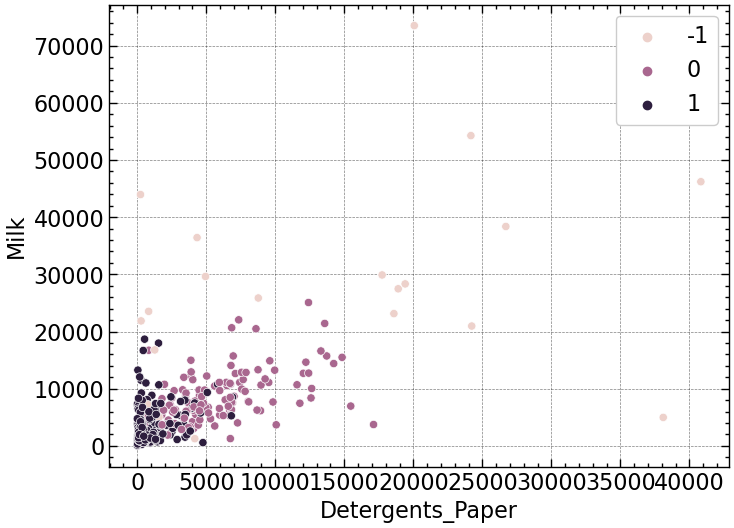

In [24]:
sns.scatterplot(x='Detergents_Paper', y='Milk', hue = model.labels_, data=df);

## Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.

In [25]:
df['labels'] = model.labels_

In [26]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


## Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.

In [27]:
cats = df.drop(['Channel','Region'], axis =1)
cats_mean = cats.groupby('labels').mean()

In [28]:
cats_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


Berdasarkan data di atas, kita bisa langsung melihat outlier adalah pembelanja tertinggi.

Dan juga kita dapat melihat bahwa Klaster 1 adalah kelompok dengan pembelanja paling rendah untuk Milk, Category, Detergents_Paper dan Delicassen.

Dari heatmap kita dapat dengan jelas melihat pembelanjaan terendah dan pembelanjaan tertinggi. Untuk outlier, warna baris pertama (outlier) kini jelas diubah menjadi pembelanjaan tertinggi.

## Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler_cat_means = scaler.fit_transform(cats_mean)

In [35]:
scaler_mean = pd.DataFrame(scaler_cat_means, cats_mean.index , cats_mean.columns)

In [36]:
scaler_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


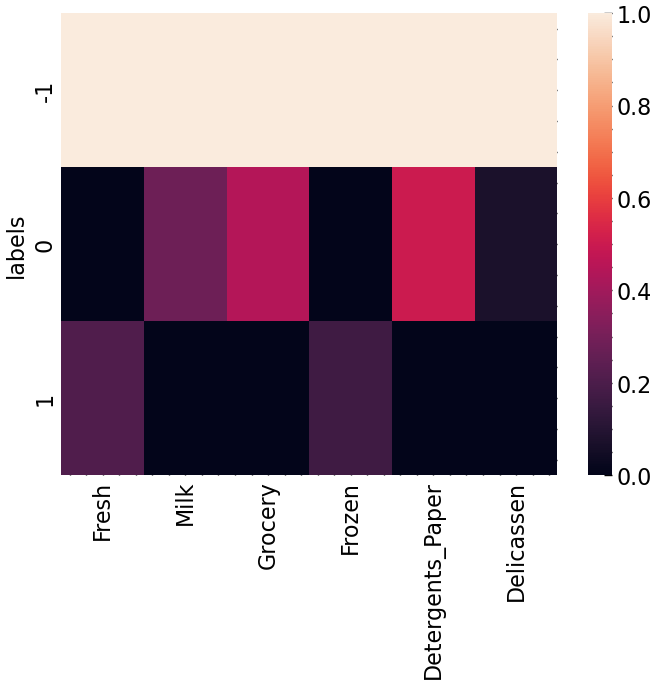

In [38]:
sns.heatmap(scaler_mean);

In [ ]:
## outliers removed

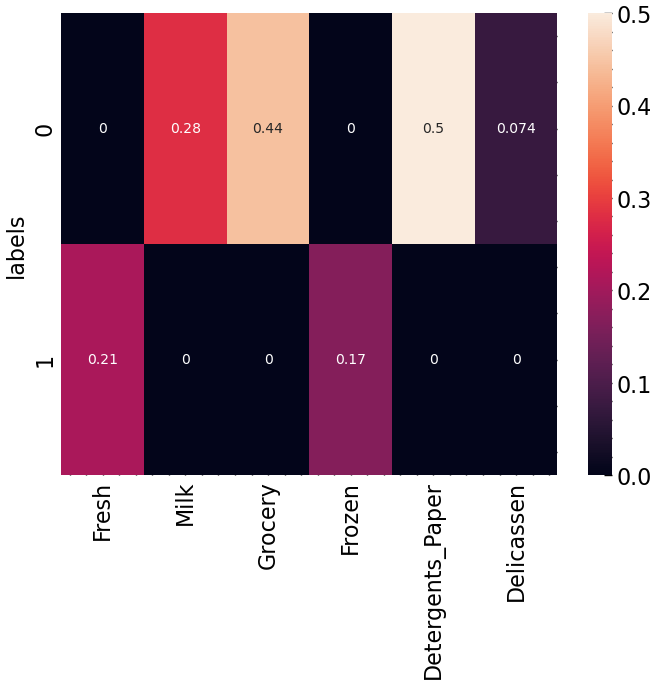

In [42]:
sns.heatmap(scaler_mean.loc[[0,1]], annot=True);

* TASK: What spending category were the two clusters mode different in?

    We can see that Detergents_Papercategory has the most different between Cluster 0 and Cluster 1.